In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Import data

Datasets for machine learning can be loaded from a variety of souces. 
Tabular data can be loaded through the [*pandas*](https://pandas.pydata.org) package in various formats:

| Format Type | Data Description | Reader | Writer |
| ----------- | ---------------- | ------ | ------ |
| text | CSV | [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) | [pandas.to_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html) |
| text | JSON | [pandas.read_json](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html) | [pandas.to_json](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html) |
| text | HTML | [pandas.read_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html) | [pandas.to_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_html.html) |
| text | Local clipboard | [pandas.read_clipboard](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_clipboard.html) | [pandas.to_clipboard](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_clipboard.html) |
| binary | MS Excel | [pandas.read_excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html) | [pandas.to_excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_excel.html) |
| binary | HDF5 Format | [pandas.read_hdf](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_hdf.html) | [pandas.to_hdf](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_hdf.html) |

You can refer to [Pandas IO Tools](https://pandas.pydata.org/pandas-docs/stable/io.html)
for more usage of data importing using *pandas*.

For large datasets, it is recommended to use binary formats such as *HDF5* and *NPZ* for more efficient reading and writing and also reducing disk usage.

HDF5 format can be read to or write from numpy arrays conveniently using the [h5py](http://docs.h5py.org/en/stable/) package:

```python
import h5py
# read data assuming that datasets 'X' and 'y' exists in HDF5 file input_file
with h5py.File(input_file, 'r') as f:
    X = f['X'][:]
    y = f['y'][:]
# write data to HDF5 file output_file
# X and y are numpy arrays
with h5py.File(output_file, 'w') as f:
    f.create_dataset('X', data=X)
    f.create_dataset('y', data=y)
```

*NPZ* format is [native format](https://docs.scipy.org/doc/numpy/reference/routines.io.html) for numpy. *NPZ/NPY* format can be read from file using [numpy.load](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html#numpy.load) and
write to file using [numpy.save](https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html#numpy.save) 
or [numpy.savez](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html#numpy.savez).

## Import required Python packages

Documentation for required Python packages:

* [numpy](https://docs.scipy.org/doc/numpy/): arrays
* [pandas](https://pandas.pydata.org/): data IO, DataFrame
* [imbalanced-learn](https://imbalanced-learn.readthedocs.io/en/stable): deal with class imbalance
* [scikit-learn](http://scikit-learn.org/): machine learning
* [statsmodels](https://www.statsmodels.org/): statistical functions
* [matplotlib](https://matplotlib.org/): plotting
* [seaborn](https://matplotlib.org/): high-level plotting based on *matplotlib*
* [jupyter](https://jupyter.org/): Python notebook
* [mlxtend](https://rasbt.github.io/mlxtend): Extension of scikit-learn
* [graphviz](https://graphviz.readthedocs.io/en/stable/): Python binding for Graphviz graph drawing software
* [wand](http://docs.wand-py.org/en/0.4.4/): ImageMagick (image processing tool) binding for Python

In [581]:
from collections import defaultdict
# For data importing
import pandas as pd
# For machine learning
from sklearn.datasets import make_classification, make_regression, make_circles, make_moons, make_gaussian_quantiles
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, \
    roc_curve, precision_recall_curve, average_precision_score, matthews_corrcoef, confusion_matrix
from statsmodels.robust.scale import mad
# For plotting
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
from matplotlib.colors import to_hex

## Generate datasets

You can start with simple datasets that is easy to understand and visualize before handling realistic datasets.
*scikit-learn* provides many functions ([sklearn.datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)) for generating datasets easily.

### Classification dataset
For example, [sklearn.datasets.make_classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) generates samples from a mixture of Gaussian distributions with parameters to specify the number of classes,
number of features, number of classes, etc. The following example generate a two-class classification dataset of 1000 samples with 2 features for visualization. Samples are generated from two independent 2D Gaussian distributions. This dataset is suitable for linear classifier.

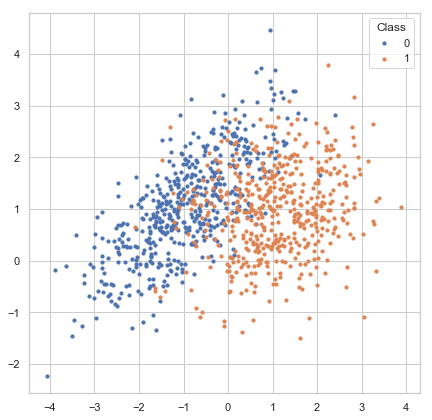

In [138]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=2,
                           n_informative=2, n_redundant=0, n_clusters_per_class=1)
fig, ax = plt.subplots(figsize=(7, 7))
for label in np.unique(y):
    ax.scatter(X[y == label, 0], X[y == label, 1], s=10, label=str(label))
ax.legend(title='Class')

### Regression dataset

You can also use [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) to generate a simple regression dataset.
The following dataset consists of 1000 samples with 1 feature and 1 response variable. A Gaussian noise 10 is added to each response variable.

Text(0,0.5,'y')

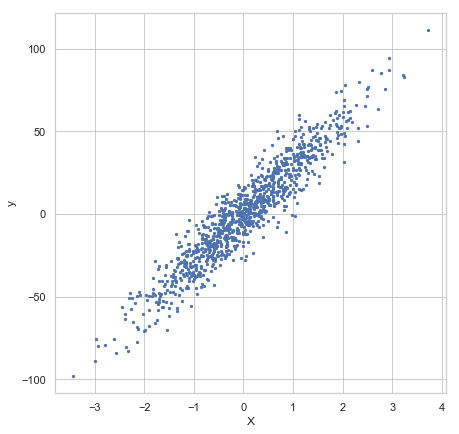

In [158]:
X, y = make_regression(n_samples=1000, n_features=1, n_informative=1, noise=10)
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0], y, s=5, label=str(label))
ax.set_xlabel('X')
ax.set_ylabel('y')

### Specialized datasets

*scikit-learn* also provides sample generators for specialized classification/regression/clustering problems, e.g. 
[make_circles](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), 
[make_moons](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html),
[make_gaussian_quantiles](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_gaussian_quantiles.html).
These datasets can be used to demonstrate cases where simple classifier or clustering algorithms don't work but 
non-linear and more complicated algorithms work better.

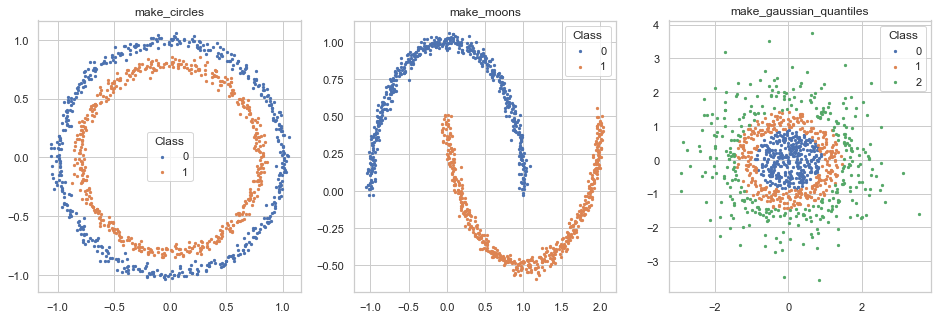

In [192]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, f in enumerate((make_circles, make_moons, make_gaussian_quantiles)):
    if f == make_gaussian_quantiles:
        X, y = f(n_samples=1000)
    else:
        X, y = f(n_samples=1000, noise=0.03)
    for label in np.unique(y):
        axes[i].scatter(X[y == label, 0], X[y == label, 1], s=5, label=str(label))
    axes[i].legend(title='Class')
    axes[i].set_title(f.__name__)

### The *digits* dataset

*scikit-learn* also includes some commonly used public datasets that is useful for exploring machine learning algorithms in the package. For example, the *digits* dataset is a small handwriting image dataset of 10 digits.

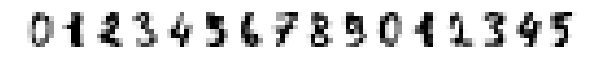

In [218]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
fig, ax = plt.subplots(figsize=(10, 11))
data = np.swapaxes(X[:16].reshape((-1, 8, 8)), 0, 1).reshape((8, -1))
with plt.rc_context({'axes.grid': False}):
    ax.imshow(data, cmap='Greys')
ax.set_axis_off()

### Dataset used in this tutorial

We use *sklearn.datasets.make_classification* to generate a dataset with 2 features

In [480]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=4,
                           n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.9)

## Single feature analysis

### Analyze the separability of classes using individual features

Plot the distribution of feature values of each feature. A good feature should separate the two class well.
The following plot shows that each individual feature can largely separate the two classes, though not perfectly.

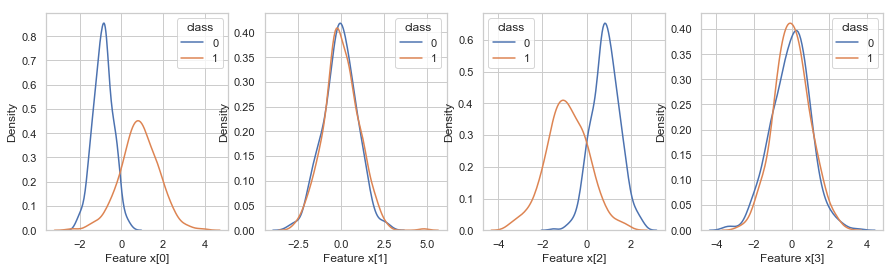

In [481]:
fig, axes = plt.subplots(1, X.shape[1], figsize=(15, 4))
for i in range(X.shape[1]):
    for label in (0, 1):
        sns.kdeplot(X[y == label, i], label=str(label), ax=axes[i])
    axes[i].legend(title='class')
    axes[i].set_xlabel('Feature x[{}]'.format(i))
    axes[i].set_ylabel('Density')

### Feature correlation analysis

Sometimes highly correlated features may be detrimental to model performance and feature selection.
A redundant feature does not provide more information, but introduces extra parameters to the model to make
the model prone to overfitting. For feature selection, the model may assign a small weight to each redundant features
too many redundant features may dilute the contribution of individual features. Although the impact of
redundant features on model performance depends on the machine learning algorithm used, 
it is a good practice to identify these features and remove/merge redundant features.

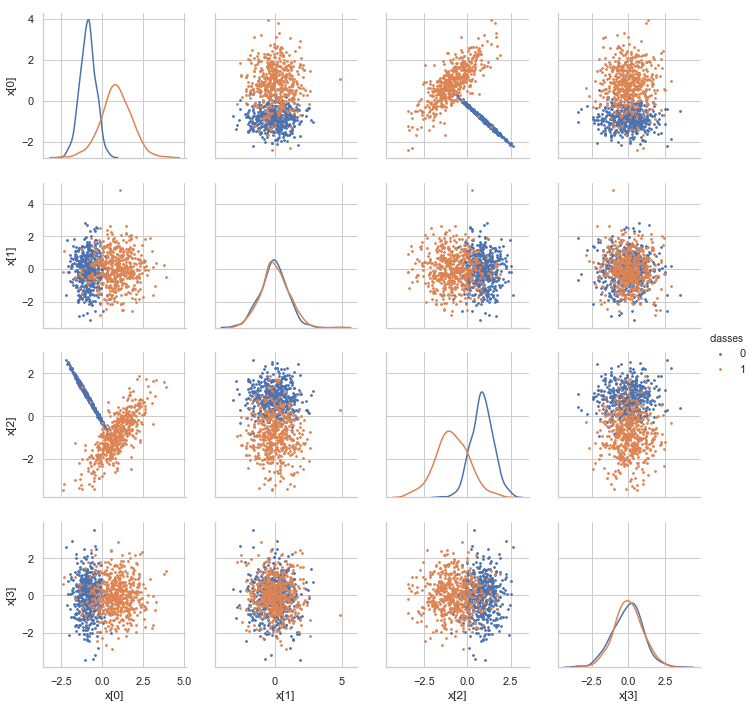

In [482]:
data = pd.DataFrame(X, columns=['x[{}]'.format(i) for i in range(X.shape[1])])
data.loc[:, 'classes'] = y.astype('U')
g = sns.PairGrid(data, hue='classes', vars=['x[{}]'.format(i) for i in range(X.shape[1])])
g.map_offdiag(plt.scatter, s=3)
g.map_diag(sns.kdeplot)
g.add_legend()

## PCA analysis

A dataset with more than 3 features cannot be visualized directly. We can use dimension reduction
to embed the data on a 2D or 3D space. A dimension reduction algorithm maps data points in high dimension to low
dimension while preserve distance in their original space as well as possible.

Principal Component Analysis (PCA) is the most common algorithm for dimension reduction.
It maps data to a new space by linear combination of original features such that new features are linearly 
independent and the total variance is maximized.

If samples can be separated well in a PCA plot, a linear classifier also works well. Otherwise, 
a non-linear classifier may improve classification performance.

Text(0,0.5,'PC2 (21.84%)')

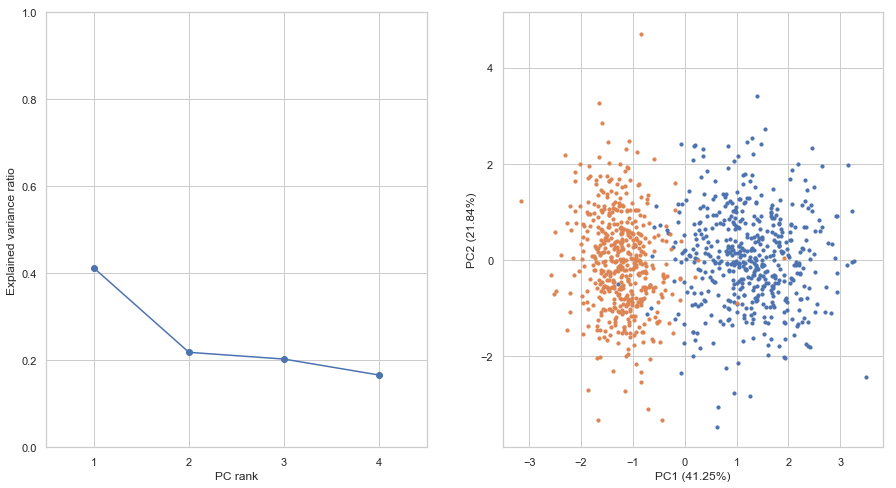

In [597]:
X_scaled = StandardScaler().fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X)
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].plot(np.arange(0.5, X.shape[1] + 0.5), pca.explained_variance_ratio_, marker='o')
axes[0].set_xticks(np.arange(0.5, X.shape[1] + 0.5))
axes[0].set_xticklabels(np.arange(1, X.shape[1] + 1))
axes[0].set_xlabel('PC rank')
axes[0].set_ylabel('Explained variance ratio')
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, X.shape[1])

for label in np.unique(y):
    axes[1].scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label, s=10)
axes[1].set_xlabel('PC1 ({:.02f}%)'.format(pca.explained_variance_ratio_[0]*100))
axes[1].set_ylabel('PC2 ({:.02f}%)'.format(pca.explained_variance_ratio_[1]*100))

## Data scaling

For most machine learning algorithms, it is recommended to scale the features to a common small scale.
Features of large or small scale increase the risk of numerical instability and also make the loss function
harder to optimize. Feature selection based on fitted coefficients of a linear model assumes that the input
features are in the same scale. Performance and convergence speed of gradient-based algorithms 
such as neural networks are largely degraded if the data is not properly scaled. 
Decision tree and random forest, however,
are less sensitive to data scale because they use rule-based criteria.

Common data scaling methods include standard/z-score scaling, min-max scaling, robust scaling and abs-max scaling.

Standard/z-score scaling first shift features to their centers(mean) and then divide by their standard deviation.
This method is suitable for most continous features of approximately Gaussian distribution.
$$ \text{zscore}(x_{ij}^{'}) = \frac{x_{ij} - \mu _{ij}}{\sigma _i} $$

Min-max scaling method scales data into range \[0, 1\].
This method is suitable for data concentrated within a range and preserves zero values for sparse data.
Min-max scaling is also sensitive to outliers in the data. Try removing outliers or clip data into
a range before scaling.

$$ \text{min_max}(x_{ij}^{'}) = \frac{x_{ij} - \text{min}_k \mathbf{x}_{ik}}
{\text{max}_k x_{ik} - \text{min}_k x_{ik}} $$

Max-abs scaling method is similar to min-max scaling, but scales data into range \[-1, 1\].
It does not shift/center the data and thus preserves signs (positive/negative) of features.
Like min-max, max-abs is sensitive to outliers.

$$ \text{max_abs}(x_{ij}^{'}) = \frac{x_{ij}}{\text{max}_k \vert x_{ik} \vert} $$

Robust scaling method use robust statistics (median, interquartile range) instead of mean and standard deviation.
Median and IQR are less sensitive to outliers.
For features with large numbers of outliers or largely deviates from normal distribution, 
robust scaling is recommended.

$$ \text{robust_scale}(x_{ij}^{'}) = \frac{x_{ij} - \text{median}_k x_{ik}}
{Q_{0.75}(\mathbf{x}_i) - Q_{0.25}(\mathbf{x}_i)} $$

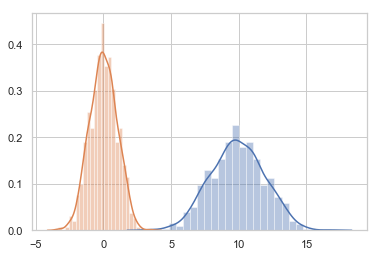

In [625]:
x = np.random.normal(10, 2, size=1000)
sns.distplot(x)
sns.distplot(np.ravel(StandardScaler().fit_transform(x.reshape((-1, 1)))))

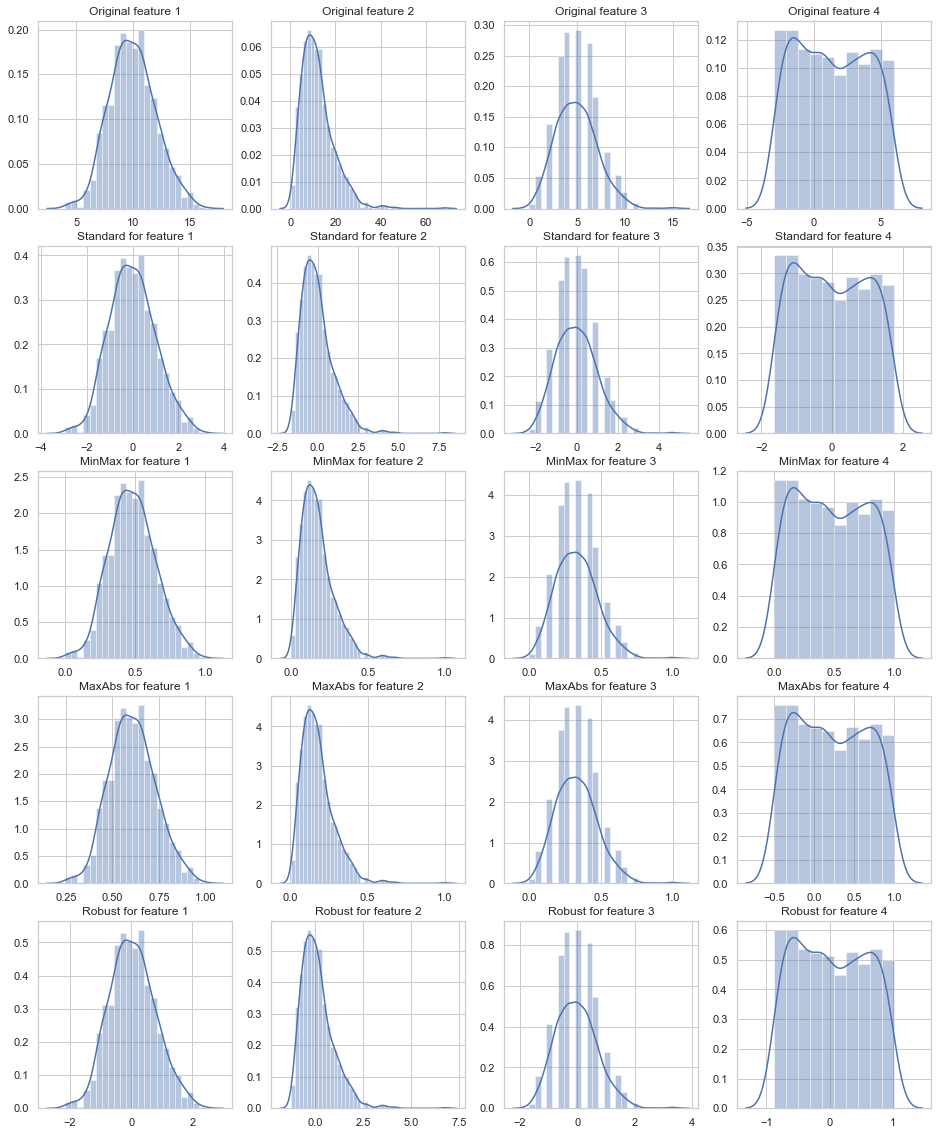

In [628]:
# Generate features with different distribution
x = np.zeros((1000, 4))
x[:, 0] = np.random.normal(10, 2, size=x.shape[0])
x[:, 1] = np.random.gamma(shape=3, scale=4, size=x.shape[0])
x[:, 2] = np.random.poisson(5, size=x.shape[0])
x[:, 3] = np.random.uniform(-3, 6, size=x.shape[0])

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
scalers = {
    'Standard': StandardScaler(),
    'MinMax': MinMaxScaler(),
    'MaxAbs': MaxAbsScaler(),
    'Robust': RobustScaler()
}
fig, axes = plt.subplots(5, x.shape[1], figsize=(16, 20))
for i in range(x.shape[1]):
    sns.distplot(x[:, i], ax=axes[0, i])
    axes[0, i].set_title('Original feature {}'.format(i + 1))
for j, scaler_name in enumerate(scalers.keys()):
    x_scaled = scalers[scaler_name].fit_transform(x)
    for i in range(x.shape[1]):
        sns.distplot(x_scaled[:, i], ax=axes[j + 1, i])
        axes[j + 1, i].set_title('{} for feature {}'.format(scaler_name, i + 1))

In [622]:
X = StandardScaler().fit_transform(X)

## Split data into training and test set

We should split the dataset into a training and test set to evaluate model performance. 
During model training, the model overfits to the data to some extent, and so model performance
on the training set is generally biases and higher than on the test set. The overfitting issue
can be resolved by adding more independent samples to the dataset. The difference of training
and test performance decreases with the increase of sample size.

Here, we use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
to randomly set 80% of the samples as training set and 20% as test set.

In [599]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('number of training samples: {}, test samples: {}'.format(X_train.shape[0], X_test.shape[0]))

number of training samples: 800, test samples: 200


## Train the model

There are numerous machine learning algorithms that can be divided into two major categories: supervised
learning and unsupervised learning. 

In supervised learning, the model takes features and class labels 
or targer values as input to build the model. If the target variable (the variable to predict) is a 
categorical (e.g. positive/negative), the problem is called classification. If the target variable is
continous (e.g. height), the problem is called regression. Most supervised learning problems fall into
these two categories, however, combination of continous output and categorical output or structured output
are also possible.

In unsupervised learning, the target variables are not specified. The objective is to identify internal
structures (clusters) of the data. After model fitting, we can assign new samples to clusters or generate
samples with similar distribution as the original data. Unsupervised learning are also useful as
a data preprocessing step prior to supervised learning.

### Logistic regression

Logistic regression is a linear model for classification. It first forms linear combination of input features
and then map the combined value to class probability between 0 and 1 through a non-linear sigmoid function.
During model training, the weights of the model are adjusted such that the cross-entropy between model prediction
and true labels is minimized.
$$ p(y_i | \mathbf{x}_i) = \frac{1}{1 + \text{exp} \left( \sum_{j=1}^M x_{ij} w_{j} + b \right)} $$

In [600]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Model inspection

### Feature importance

For linear models (e.g. Logistic regression, linear regression, linear SVM), feature importance
is usually defined as the square of coefficients:
$$ \text{FeatureImportance}_j = w_{j}^2 $$

Text(0,0.5,'Feature importance')

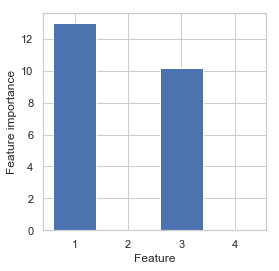

In [601]:
fig, ax = plt.subplots(figsize=(4, 4))
feature_importance = np.square(np.ravel(model.coef_))
ax.bar(np.arange(1, X.shape[1] + 1).astype('U'), feature_importance)
ax.set_xlabel('Feature')
ax.set_ylabel('Feature importance')

### Decision boundary

We can inspect decision boundaries of a model by predict class labels on a 2D grid of sample points.
You can see that the decision boundary of Logistic regression is a straight line while other classifiers
create non-linear and irregular decision boundaries.

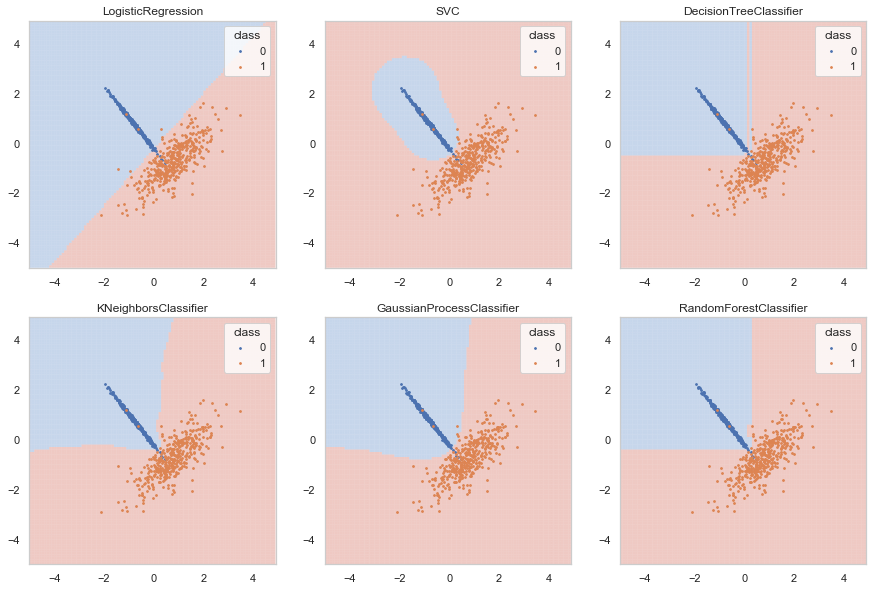

In [602]:
X_grid, Y_grid = np.mgrid[-5:5:0.1, -5:5:0.1]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

from matplotlib.colors import ListedColormap
cmap = sns.diverging_palette(252, 17, n=2)
cmap = ListedColormap(cmap)

# Use top 2 features
selected_features = np.argsort(-feature_importance)[:2]
for n, model_class in enumerate((LogisticRegression, SVC,
                                 DecisionTreeClassifier, KNeighborsClassifier,
                                 GaussianProcessClassifier, RandomForestClassifier)):
    i, j = n//3, n%3
    model = model_class()
    model.fit(X_train[:, selected_features], y_train)
    labels_grid = model.predict(np.column_stack([np.ravel(X_grid), np.ravel(Y_grid)]))
    
    axes[i, j].pcolor(X_grid, Y_grid, labels_grid.reshape(X_grid.shape), 
                          cmap=cmap, linewidth=0, edgecolor='face', alpha=0.3)
    axes[i, j].set_title(model_class.__name__)
    for label in np.unique(y):
        axes[i, j].scatter(X_train[y_train == label, selected_features[0]],
                           X_train[y_train == label, selected_features[1]],
                           s=3, label=str(label))
    axes[i, j].legend(title='class')

## Evaluate the model

### Predict labels on the test dataset

To evaluate performance of the model, we use the *predict* method of the estimator
to predict class labels of test data. This will return an integer array indicating class labels.

In [322]:
y_pred = model.predict(X_test)

### Confusion matrix

The most common way to evaluate classification performance is to construct a 
[confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

A confusion matrix summarizes the number of correctly or wrongly predicted samples and is usually 
made up of four entries:

| Predicted | Negative | Positive |
| --------- | -------- | -------- |
| **True**      |          |          |
| **Negative**  | True Negative (TN) | False Negative (FN) |
| **Positive**  | False Positive (FP) | True Positive (TP) |

In [323]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=pd.Series(['Negative', 'Positive'], name='Predicted'),
             index=pd.Series(['Negative', 'Positive'], name='True'))

Predicted,Negative,Positive
True,,
Negative,77,28
Positive,17,78


### Evaluation metrics for classification

A variety of metrics can be calculate from entries in the confusion matrix.

Accuracy (0 ~ 1) summarizes both positive and negative predictions, but is biased if the classes are imbalanced:
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

Recall/sensitivity (0 ~ 1) summarizes how well the model finds out positive samples:
$$\text{Recall/Sensitivity} = \frac{TP}{TP + FN}$$

Precision/positive predictive value (0 ~ 1) summarizes how well the model finds out negative samples:
$$\text{Precision/Positive Predictive Value} = \frac{TP}{TP + FP}$$

F1 score (0 ~ 1) balances between positive predictive value (PPV) and true positive rate (TPR) and is more suitable for
imbalanced dataset:
$$\text{F1 score} = 2 \frac{PPV \cdot TPR}{PPV + TPR}$$

Matthews correlation coefficient (MCC) (-1 ~ 1) is another metric that balances between recall and precision:
$$\text{MCC} = \frac{TP \times TN - FP \times FN}
{(TP + FN)(TP + FP)(TN + FP)(TN + FN)}$$

In [332]:
scorers = {'accuracy': accuracy_score,
           'recall': recall_score,
           'precision': precision_score,
           'f1': f1_score,
           'mcc': matthews_corrcoef
}
for metric in scorers.keys():
    print('{} = {}'.format(metric, scorers[metric](y_test, y_pred)))

accuracy = 0.775
recall = 0.8210526315789474
precision = 0.7358490566037735
f1 = 0.7761194029850746
mcc = 0.5546918944318417


### Predict class probability

Many classifiers first predict a continous value for each sample indicating confidence/probability of the prediction
and then choose a fixed cutoff (e.g. 0.5 for probability values) to convert the continous values to binary labels.
We can get the raw prediction values through the *predict_proba* method.

In [363]:
y_score = model.predict_proba(X_test)

### ROC curve and precision-recall curve

Sometimes a single fixed cutoff is insufficient to evaluate model performance.
Receiver Operating Characterisic (ROC) curve and Precision-Recall curve are useful tools to inspect the
model performance with different cutoffs. ROC curve and precision-recall curve are also less sensitive
to class imbalance. 
Compared to ROC curve, precision-recall curve are more suitable for extremely imbalanced datasets.

The area under the ROC curve (AUROC) or average precision (AP) is a single value
that summarizes average model performance under different cutoffs and are very commonly used to report
classification performance.

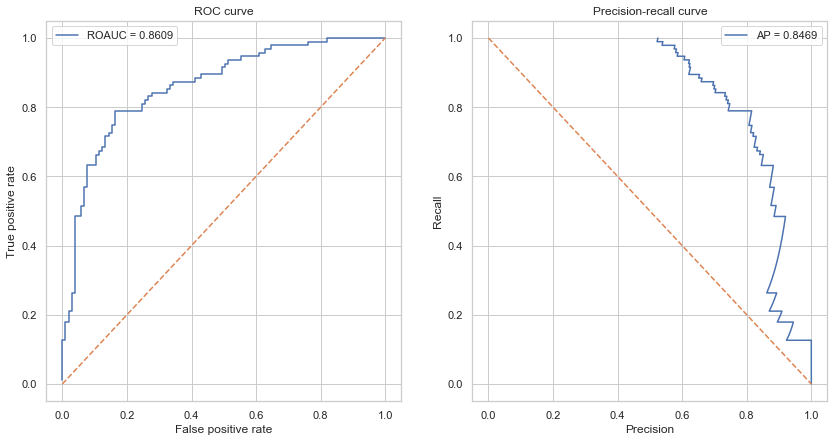

In [364]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
ax = axes[0]
ax.plot(fpr, tpr, label='ROAUC = {:.4f}'.format(roc_auc_score(y_test, y_score[:, 1])))
ax.plot([0, 1], [0, 1], linestyle='dashed')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.set_title('ROC curve')
ax.legend()
# predision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:, 1])
ax = axes[1]
ax.plot(precision, recall, label='AP = {:.4f}'.format(average_precision_score(y_test, y_score[:, 1])))
ax.plot([0, 1], [1, 0], linestyle='dashed')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-recall curve')
ax.legend()

## Cross-validation

For very large datasets, a single split of the dataset into a training set and a test set is sufficient
to evaluate the model performance. However, for small dataset, the test samples represent only a small
proportion of samples in future predictions. The model performance evaluated on the test samples varies
greatly between resamplings of the dataset.

### K-fold cross-validation

Cross-validation is a commonly used technique for model evaluation on small dataset. 
In **k-fold cross-validation**, the dataset is evenly divided into *k* partitions(folds).
In each round of validation, the model is tested on one parition and trained on remaining *(k-1)/k* 
partitions. K-fold cross-validation ensures that there is no overlap between training and test samples
but can have overlaps between rounds. Each sample is set as test sample for exactly once.
Finally, the average performance is calculated across *k* rounds.

*scikit-learn* provides [many functions for splitting datasets]
(http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

Here, we use [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
to create 10-fold cross-validation datasets. 5 and 10 are commonly used values for *k*.
Use 10-fold cross-validation if the sample size and computation burden permits.

The following code illustrates how *KFold* splits the dataset. 
Black boxes indicates test samples in each round.

Text(0.5,0,'Sample')

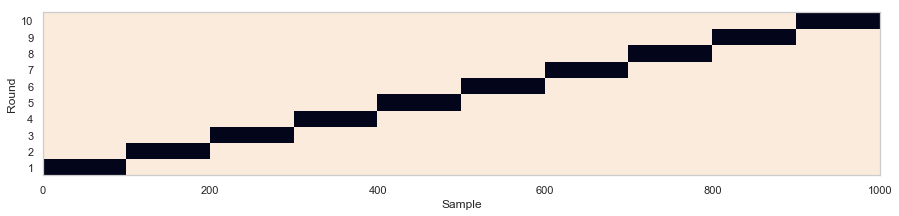

In [368]:
n_splits = 10

kfold = KFold(n_splits=n_splits)
is_train = np.zeros((n_splits, X.shape[0]), dtype=np.bool)
for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    is_train[i, train_index] = 1

fig, ax = plt.subplots(figsize=(15, 3))
ax.pcolormesh(is_train)
ax.set_yticks(np.arange(n_splits) + 0.5)
ax.set_yticklabels(np.arange(n_splits) + 1)
ax.set_ylabel('Round')
ax.set_xlabel('Sample')

Then we train the model on each training set and predict labels and scores on the whole dataset.

In [380]:
predictions = np.zeros((n_splits, X.shape[0]), dtype=np.int32)
predicted_scores = np.zeros((n_splits, X.shape[0]))

for i in range(n_splits):
    model.fit(X[is_train[i]], y[is_train[i]])
    predictions[i] = model.predict(X)
    predicted_scores[i] = model.predict_proba(X)[:, 1]

### Collect evaluation metrics

Next, we evaluates the model using K-fold cross-validation.

In [440]:
cv_metrics = pd.DataFrame(np.zeros((n_splits*2, len(scorers) + 2)),
                          columns=list(scorers.keys()) + ['roc_auc', 'average_precision'])
cv_metrics.loc[:, 'dataset'] = np.empty(n_splits*2, dtype='U')
for i in range(n_splits):
    for metric in scorers.keys():
        cv_metrics.loc[i*2 + 0, metric] = scorers[metric](y[is_train[i]], predictions[i, is_train[i]])
        cv_metrics.loc[i*2 + 1, metric] = scorers[metric](y[~is_train[i]], predictions[i, ~is_train[i]])
    cv_metrics.loc[i*2 + 0, 'roc_auc'] = roc_auc_score(y[is_train[i]], predicted_scores[i, is_train[i]])
    cv_metrics.loc[i*2 + 1, 'roc_auc'] = roc_auc_score(y[~is_train[i]], predicted_scores[i, ~is_train[i]])
    cv_metrics.loc[i*2 + 0, 'average_precision'] = average_precision_score(y[is_train[i]], 
                                                                           predicted_scores[i, is_train[i]])
    cv_metrics.loc[i*2 + 1, 'average_precision'] = average_precision_score(y[~is_train[i]], 
                                                                           predicted_scores[i, ~is_train[i]])
    cv_metrics.loc[i*2 + 0, 'dataset'] = 'train'
    cv_metrics.loc[i*2 + 1, 'dataset'] = 'test'

cv_metrics.head()

,accuracy,recall,precision,f1,mcc,roc_auc,average_precision,dataset
0,0.793333,0.783964,0.798186,0.791011,0.586741,0.876449,0.881378,train
1,0.800000,0.784314,0.816327,0.800000,0.600640,0.873950,0.903463,test
2,0.794444,0.773034,0.803738,0.788087,0.589086,0.873584,0.880102,train
3,0.790000,0.800000,0.814815,0.807339,0.576730,0.898990,0.927346,test
4,0.801111,0.777027,0.811765,0.794016,0.602465,0.876180,0.886633,train


### Summarize evaluate metrics

Take average of model performance across cross-validation runs:

In [442]:
cv_metrics_mean = cv_metrics.groupby('dataset').mean()
cv_metrics_mean

,accuracy,recall,precision,f1,mcc,roc_auc,average_precision
dataset,,,,,,,
test,0.790000,0.778696,0.799108,0.787705,0.580135,0.872866,0.882269
train,0.793889,0.780860,0.801819,0.791176,0.587952,0.876587,0.885591


Text(0.5,1,'Model performance using 10-fold cross-validation')

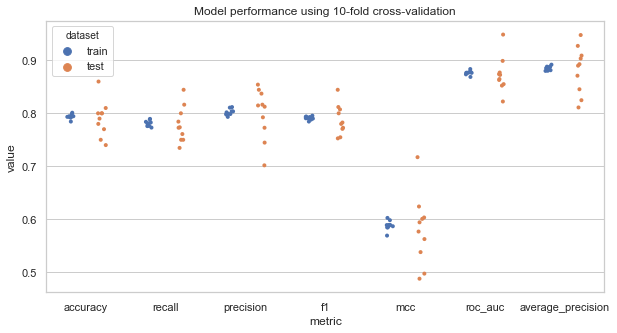

In [439]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_data = pd.melt(cv_metrics, id_vars=['dataset'], var_name='metric', value_name='value')
sns.stripplot(x='metric', y='value', hue='dataset', 
              dodge=True, jitter=True, data=plot_data, size=4, ax=ax)
#sns.pointplot(x='metric', y='value', hue='dataset', data=plot_data, markers="d", 
#              join=False, ci=None, ax=ax, dodge=True, palette='dark')
ax.set_title('Model performance using 10-fold cross-validation')

### ROC and PR curves

For each cross-validation run, compute an ROC/PR curve. 
Then plot the mean and confidence intervals across cross-validation runs.

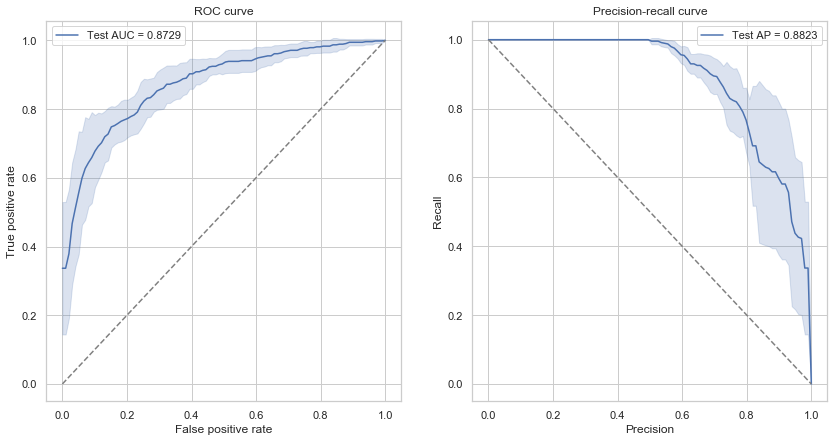

In [452]:
from scipy import interp

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
# ROC curve
ax = axes[0]
all_fprs = np.linspace(0, 1, 100)
roc_curves = np.zeros((n_splits, len(all_fprs), 2))
for i in range(n_splits):
    fpr, tpr, thresholds = roc_curve(y[~is_train[i]], predicted_scores[i, ~is_train[i]])
    roc_curves[i, :, 0] = all_fprs
    roc_curves[i, :, 1] = interp(all_fprs, fpr, tpr)
roc_curves = pd.DataFrame(roc_curves.reshape((-1, 2)), columns=['fpr', 'tpr'])
sns.lineplot(x='fpr', y='tpr', data=roc_curves, ci='sd', ax=ax,
             label='Test AUC = {:.4f}'.format(cv_metrics_mean.loc['test', 'roc_auc']))
#ax.plot(fpr, tpr, label='ROAUC = {:.4f}'.format(roc_auc_score(y_test, y_score[:, 1])))
#ax.plot([0, 1], [0, 1], linestyle='dashed')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.plot([0, 1], [0, 1], linestyle='dashed', color='gray')
ax.set_title('ROC curve')
ax.legend()

# predision-recall curve
ax = axes[1]
all_precs = np.linspace(0, 1, 100)
pr_curves = np.zeros((n_splits, len(all_precs), 2))
for i in range(n_splits):
    fpr, tpr, thresholds = precision_recall_curve(y[~is_train[i]], predicted_scores[i, ~is_train[i]])
    pr_curves[i, :, 0] = all_precs
    pr_curves[i, :, 1] = interp(all_precs, fpr, tpr)
pr_curves = pd.DataFrame(pr_curves.reshape((-1, 2)), columns=['precision', 'recall'])
sns.lineplot(x='precision', y='recall', data=pr_curves, ci='sd', ax=ax,
             label='Test AP = {:.4f}'.format(cv_metrics_mean.loc['test', 'average_precision']))

ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.plot([0, 1], [1, 0], linestyle='dashed', color='gray')
ax.set_title('Precision-recall curve')
ax.legend()

## Homework

1. Understand and run all code in this tutorial using Jupyter. You can generate different types of dataset or use a real dataset.

2. Try different classifiers (SVC, random forest, logistic regression, KNN) and compare model performance.

3. Try different K's in K-fold cross-validation and compare mean and variance of model performance.

4. Try different class ratios and compare model performance.

## Further reading

### Books

1. Trevor Hastie, Robert Tibshirani, Jerome Friedman. (2009). The Elements of Statistical Learning. 
2. Christopher Bishop. (2006). Pattern Recognition and Machine Learning.
3. Kevin P. Murphy. (2012). Machine Learning A Probabilisitic Perspective.
4. Sergios Theodoridis. (2009). Pattern Recognition.

### Class imbalance

1. He, H., and Garcia, E.A. (2009). Learning from Imbalanced Data. IEEE Transactions on Knowledge and Data Engineering 21, 1263–1284.
2. Batista, G.E.A.P.A., Prati, R.C., and Monard, M.C. (2004). A Study of the Behavior of Several Methods for Balancing Machine Learning Training Data. SIGKDD Explor. Newsl. 6, 20–29.
3. Chawla, N.V., Bowyer, K.W., Hall, L.O., and Kegelmeyer, W.P. (2002). SMOTE: Synthetic Minority Over-sampling Technique. J. Artif. Int. Res. 16, 321–357.

### Machine learning in R

The *caret* package (a tutorial in GitBook): [http://topepo.github.io/caret](http://topepo.github.io/caret)